## Importing various Libraries

In [1]:
#importing various libralies

import requests
from bs4 import BeautifulSoup
import pandas as pd
import sqlite3
import json
import matplotlib.pyplot as plt
import seaborn as sns

## Creating a Database to store the Data

In [2]:
#creating a connection to a database
conn=sqlite3.connect('movies.db')
cur=conn.cursor()


# **1. Getting Data and cleaning it**

## Getting data from the various websites

In [3]:
# Scraping Data from Box Office Mojo

listofyrs=range(1977,2025,1)     #List of year for the available data
frames=[]                        #Collection fo all dataframes

for year in listofyrs:           #looping through the years

    # url2='https://www.boxofficemojo.com/year/world/' + str(2024) + '/'
    url2='https://www.boxofficemojo.com/year/world/' + str(year) + '/'
    html2=requests.get(url2)
    soup=BeautifulSoup(html2.content,'html.parser')
    # soup.prettify


    allrows=soup.findAll('tr')
    allrows=allrows[1:]
    # allrows[0].findAll('td')[0].text

    row=[]  #collection for each row
    rows=[] #collection for all rows
    for i in range(len(allrows)):
        for cell in allrows[i].findAll('td'):
            row.append(cell.text)
        row.insert(0,year)
        rows.append(row)
        row=[]

    df=pd.DataFrame(rows)
    df=df.reset_index(drop=True)

    frames.append(df)
df = pd.concat(frames)
print(html2)
df.head()


<Response [200]>


,0,1,2,3,4,5,6,7
0,1977,1,Star Wars: Episode IV - A New Hope,"$307,263,857","$307,263,857",100%,-,-
1,1977,2,Smokey and the Bandit,"$126,737,428","$126,737,428",100%,-,-
2,1977,3,Close Encounters of the Third Kind,"$116,395,460","$116,395,460",100%,-,-
3,1977,4,Saturday Night Fever,"$94,213,184","$94,213,184",100%,-,-
4,1977,5,A Bridge Too Far,"$50,750,000","$50,750,000",100%,-,-


In [4]:
# Checking the number of movie titles scrapped
len(df)

8840

There are 8840 movie titles from the boxofficemojo website

## Cleaning the data and inserting the column headers

In [5]:
# inserting columns to the data frame
moviesmaintable=soup.find('table',class_="a-bordered a-horizontal-stripes a-size-base a-span12 mojo-body-table mojo-table-annotated")
allcolumns=moviesmaintable.findAll('th')
columns=[]
for column in allcolumns:
    columns.append(column.text.strip())
columns.insert(0,'Year')
columns[-1]='ForeignPer'
columns[-3]='DomesticPer'
df.columns=columns

# Cleaning the data to remove various string characters
df['Domestic']=df['Domestic'].str.replace('$','').str.replace(',','').str.replace('-','0').str.replace('<','')
df['Worldwide']=df['Worldwide'].str.replace('$','').str.replace(',','').str.replace('-','0').str.replace('<','')
df['Foreign']=df['Foreign'].str.replace('$','').str.replace(',','').str.replace('-','0').str.replace('<','')
df['DomesticPer']=df['DomesticPer'].str.replace('%','').str.replace('-','0').str.replace('<','')
df['ForeignPer']=df['ForeignPer'].str.replace('%','').str.replace('-','0').str.replace('<','')

# Converting the colums to the right data type
df['Domestic']=df['Domestic'].astype(float)
df['Worldwide']=df['Worldwide'].astype(float)
df['Foreign']=df['Foreign'].astype(float)
df['DomesticPer']=df['DomesticPer'].astype(float)
df['ForeignPer']=df['ForeignPer'].astype(float)
df['Year']=df['Year'].astype(str)

df.head()


<ipython-input-5-d307a81bb527>:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Domestic']=df['Domestic'].str.replace('$','').str.replace(',','').str.replace('-','0').str.replace('<','')
<ipython-input-5-d307a81bb527>:14: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Worldwide']=df['Worldwide'].str.replace('$','').str.replace(',','').str.replace('-','0').str.replace('<','')
<ipython-input-5-d307a81bb527>:15: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Foreign']=df['Foreign'].str.replace('$','').str.replace

,Year,Rank,Release Group,Worldwide,Domestic,DomesticPer,Foreign,ForeignPer
0,1977,1,Star Wars: Episode IV - A New Hope,307263857.0,307263857.0,100.0,0.0,0.0
1,1977,2,Smokey and the Bandit,126737428.0,126737428.0,100.0,0.0,0.0
2,1977,3,Close Encounters of the Third Kind,116395460.0,116395460.0,100.0,0.0,0.0
3,1977,4,Saturday Night Fever,94213184.0,94213184.0,100.0,0.0,0.0
4,1977,5,A Bridge Too Far,50750000.0,50750000.0,100.0,0.0,0.0


In [6]:
# Exploring the numerical columns in the data
df.describe()

,Worldwide,Domestic,DomesticPer,Foreign,ForeignPer
count,8.840000e+03,8.840000e+03,8840.000000,8.840000e+03,8840.000000
mean,7.698463e+07,3.471478e+07,62.072624,4.226802e+07,37.926776
std,1.594010e+08,6.267812e+07,39.563880,1.063673e+08,39.562313
min,7.850000e+02,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,9.548621e+06,1.534337e+06,29.075000,0.000000e+00,0.000000
50%,2.772454e+07,1.331412e+07,70.100000,6.332458e+06,29.900000
75%,7.152339e+07,4.038419e+07,100.000000,3.643684e+07,70.925000
max,2.799439e+09,9.366622e+08,100.000000,1.993811e+09,100.000000


In [7]:
# exploring the colums and their datatype.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8840 entries, 0 to 199
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           8840 non-null   object 
 1   Rank           8840 non-null   object 
 2   Release Group  8840 non-null   object 
 3   Worldwide      8840 non-null   float64
 4   Domestic       8840 non-null   float64
 5   DomesticPer    8840 non-null   float64
 6   Foreign        8840 non-null   float64
 7   ForeignPer     8840 non-null   float64
dtypes: float64(5), object(3)
memory usage: 879.6+ KB


In [8]:
# checking for duplicate
df.duplicated().sum()

0

There are no duplicated rows

In [9]:
# Checking for duplicates based on the movie tile column
df['Release Group'].duplicated().sum()

202

In [10]:
df['Release Group'].duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Name: Release Group, Length: 8840, dtype: bool

Finding:- The are 202 titles with the same name.   
Action:- Drop the Earlier movie and Keep the latest.

In [11]:
df.drop_duplicates(subset=['Release Group'], keep='last')

,Year,Rank,Release Group,Worldwide,Domestic,DomesticPer,Foreign,ForeignPer
0,1977,1,Star Wars: Episode IV - A New Hope,307263857.0,307263857.0,100.0,0.0,0.0
1,1977,2,Smokey and the Bandit,126737428.0,126737428.0,100.0,0.0,0.0
2,1977,3,Close Encounters of the Third Kind,116395460.0,116395460.0,100.0,0.0,0.0
3,1977,4,Saturday Night Fever,94213184.0,94213184.0,100.0,0.0,0.0
4,1977,5,A Bridge Too Far,50750000.0,50750000.0,100.0,0.0,0.0
...,...,...,...,...,...,...,...,...
195,2024,196,3310'dan Tüm Birimlere,31417.0,0.0,0.0,31417.0,100.0
196,2024,197,Naa Saami Ranga,30693.0,0.0,0.0,30693.0,100.0
197,2024,198,The Muckels,30451.0,0.0,0.0,30451.0,100.0
198,2024,199,10 Things I Hate About You 2023 Re-release,29936.0,0.0,0.0,29936.0,100.0


In [12]:
# inserting the mojosmovies dataframe to the sql database
df.to_sql('mojosmovies',conn,if_exists='replace',index=False)

8840

In [13]:
#Testing if the data is in the database
pd.read_sql('select * from mojosmovies',conn).head()

,Year,Rank,Release Group,Worldwide,Domestic,DomesticPer,Foreign,ForeignPer
0,1977,1,Star Wars: Episode IV - A New Hope,307263857.0,307263857.0,100.0,0.0,0.0
1,1977,2,Smokey and the Bandit,126737428.0,126737428.0,100.0,0.0,0.0
2,1977,3,Close Encounters of the Third Kind,116395460.0,116395460.0,100.0,0.0,0.0
3,1977,4,Saturday Night Fever,94213184.0,94213184.0,100.0,0.0,0.0
4,1977,5,A Bridge Too Far,50750000.0,50750000.0,100.0,0.0,0.0


In [14]:
### Reading the Movies from The Movies DB from a CSV File

In [28]:
data = pd.read_csv('tmdb.movies.csv')
data

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [29]:
# Removing the unnamed column fro the data frame
data=data[['genre_ids','id','original_language','original_title','popularity','release_date','title','vote_average','vote_count']]
data.head()


,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [30]:
# checking for duplicates
data.duplicated().sum()

1020

In [31]:
# Removing the duplicates
data.drop_duplicates(keep='first',inplace=True)

<ipython-input-31-69cc3ed7e394>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(keep='first',inplace=True)


In [32]:
data.shape

(25497, 9)

There are 25497 Unique row

In [33]:
# Checking for duplicates based on the Movie title
data['title'].duplicated().sum()

809

There are 809 similar titles.

In [35]:
# Droping the rows with similar tile and keeping the last
data=data.drop_duplicates(subset=['title'], keep='last')
data.shape

(24688, 9)

In [36]:
# storing the data in an sql database
data.to_sql('tmdbmovies',conn,index=False,if_exists='replace')

24688

### Merging the various datasets

In [49]:
df=pd.read_sql("""select * from tmdbmovies as tm inner join mojosmovies as mj on mj.'Release Group'=tm.original_title """,conn)
df.tail()


,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,Year,Rank,Release Group,Worldwide,Domestic,DomesticPer,Foreign,ForeignPer
1622,"[99, 99]",474464,en,The Judge,0.6,2018-04-13,The Judge,7.5,2,2014,90,The Judge,84419388.0,47119388.0,55.8,37300000.0,44.2
1623,[18],514410,en,Ice,0.6,2018-03-26,Ice,7.3,3,2018,170,Ice,29806210.0,0.0,0.0,29806210.0,100.0
1624,[27],536404,en,Wolf,0.6,2018-07-15,Wolf,6.0,1,1994,20,Wolf,65002597.0,65002597.0,100.0,0.0,0.0
1625,[10402],509306,en,The Box,0.6,2018-03-04,The Box,6.0,1,2009,142,The Box,33333531.0,15051977.0,45.2,18281554.0,54.8
1626,[],552957,pt,Point of No Return,0.6,2018-09-19,Point of No Return,4.0,1,1993,54,Point of No Return,30038362.0,30038362.0,100.0,0.0,0.0


### Getting the genre data for the movies using an API

In [44]:
with open('key.json') as f:
    key=json.load(f)['key']

genre=requests.get(f'https://api.themoviedb.org/3/genre/movie/list?api_key={key}')
genres=genre.json()['genres']
genres
# genres=pd.DataFrame(genre.json()['genres'])


[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 16, 'name': 'Animation'},
 {'id': 35, 'name': 'Comedy'},
 {'id': 80, 'name': 'Crime'},
 {'id': 99, 'name': 'Documentary'},
 {'id': 18, 'name': 'Drama'},
 {'id': 10751, 'name': 'Family'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 36, 'name': 'History'},
 {'id': 27, 'name': 'Horror'},
 {'id': 10402, 'name': 'Music'},
 {'id': 9648, 'name': 'Mystery'},
 {'id': 10749, 'name': 'Romance'},
 {'id': 878, 'name': 'Science Fiction'},
 {'id': 10770, 'name': 'TV Movie'},
 {'id': 53, 'name': 'Thriller'},
 {'id': 10752, 'name': 'War'},
 {'id': 37, 'name': 'Western'}]

In [50]:
# Getting the name of the various genre combinations
genreswithMappedNames=[]

for item in df['genre_ids']: #[0].replace('[','').replace(']','').split(','):
    inneritemsstring=[]
    while True:
        if item.strip() =='[]':
            genre=''
            inneritemsstring.append(' ')
        else:
            genre=''

            items=item.replace('[','').replace(']','').split(',')
            for inneritem in items:
                inneritem=inneritem.strip()
                # inneritemsstring.append(inneritem)
                for obj in genres:
                    if int(inneritem)==obj['id']:
                        # print(obj['name'])
                        inneritemsstring.append(obj['name'])
                        break

            # print(inneritemsstring)
        genreswithMappedNames.append(str(inneritemsstring))

        break
genreswithMappedNames[0:5]

["['Adventure', 'Fantasy', 'Family']",
 "['Fantasy', 'Adventure', 'Animation', 'Family']",
 "['Adventure', 'Action', 'Science Fiction']",
 "['Animation', 'Comedy', 'Family']",
 "['Action', 'Science Fiction', 'Adventure']"]

 Adding the various genre names to the data frame

In [51]:
df['Genre_names']=genreswithMappedNames
df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,Year,Rank,Release Group,Worldwide,Domestic,DomesticPer,Foreign,ForeignPer,Genre_names
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010,3,Harry Potter and the Deathly Hallows: Part 1,972050767.0,295983305.0,30.4,676067462.0,69.6,"['Adventure', 'Fantasy', 'Family']"
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010,10,How to Train Your Dragon,494878759.0,217581231.0,44.0,277297528.0,56.0,"['Fantasy', 'Adventure', 'Animation', 'Family']"
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,2010,7,Iron Man 2,623933331.0,312433331.0,50.1,311500000.0,49.9,"['Adventure', 'Action', 'Science Fiction']"
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,1995,1,Toy Story,244651588.0,191796233.0,78.4,52855355.0,21.6,"['Animation', 'Comedy', 'Family']"
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,2010,4,Inception,828258695.0,292576195.0,35.3,535682500.0,64.7,"['Action', 'Science Fiction', 'Adventure']"


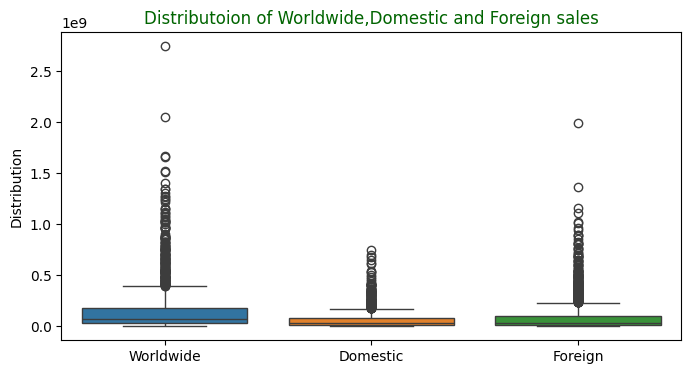

In [104]:
plt.figure(figsize=(8,4))
sns.boxplot(df[['Worldwide','Domestic','Foreign']],)
plt.ylabel('Distribution')
plt.title('Distributoion of Worldwide,Domestic and Foreign sales',color='darkgreen');

Though the data has outliers it is not necessary to remove them because the represent the sales value for differnt movies.

Popular or highly anticipated movies are likely to have high sales compared with the others

## **2. Visualizing the data**

<ipython-input-143-9376c72e8aaf>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=x.index, rotation=45, ha='right');


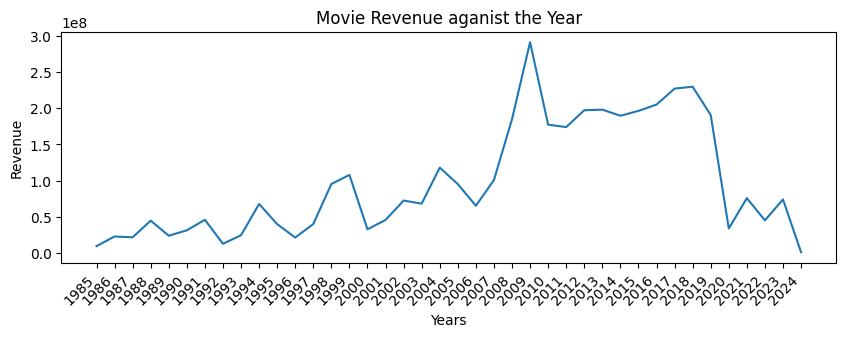

In [143]:
# Revenue over the years
x=df.groupby('Year')['Worldwide'].mean()
x=x.sort_index(ascending=True).tail(40)
fig, ax = plt.subplots(figsize=(10,3))
sns.lineplot(x=x.index,y=x.values)
plt.title('Movie Revenue aganist the Year')
plt.xlabel('Years')
plt.ylabel('Revenue')
ax.set_xticklabels(labels=x.index, rotation=45, ha='right');

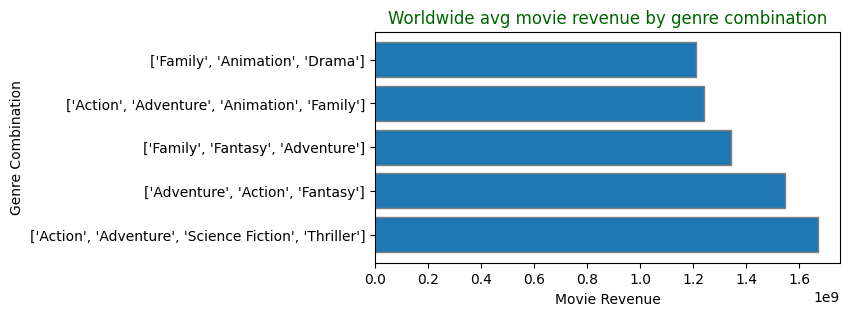

In [103]:
# Bar chart for the Top 5 genre combination and revenue generated by the Movies Worldwide
plt.figure(figsize=(6,3))
x=df.groupby('Genre_names')['Worldwide'].mean()
x=x.sort_values(ascending=False).head(5)
plt.barh( x.index,x.values,edgecolor='grey')
plt.title('Worldwide avg movie revenue by genre combination',color='darkgreen')
plt.xlabel('Movie Revenue')
plt.ylabel('Genre Combination');

Movies that are a combination of Action,Adventure,science Fiction and Thriller have the highest average sales world wide

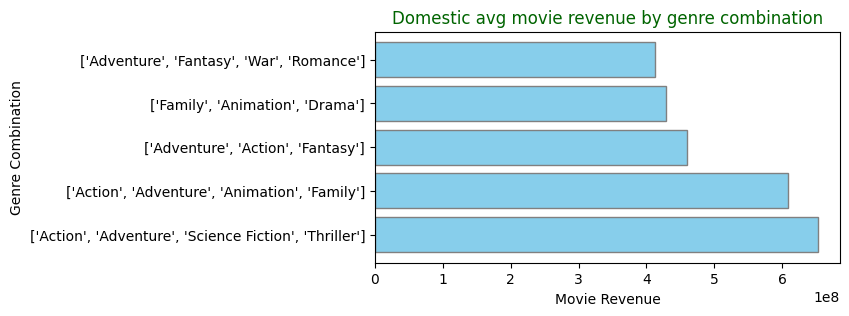

In [102]:
# Bar chart for the Top 5 genre combination and revenue generated by the Movies Domestic market
x=df.groupby('Genre_names')['Domestic'].mean()
x=x.sort_values(ascending=False).head(5)

plt.figure(figsize=(6,3))
plt.barh( x.index,x.values, color='skyblue',edgecolor='grey')
plt.title('Domestic avg movie revenue by genre combination',color='darkgreen')
plt.xlabel('Movie Revenue')
plt.ylabel('Genre Combination');

* Movies that are a combination of Action,Adventure,science Fiction and Thriller have the highest average sales in the Domestic market.

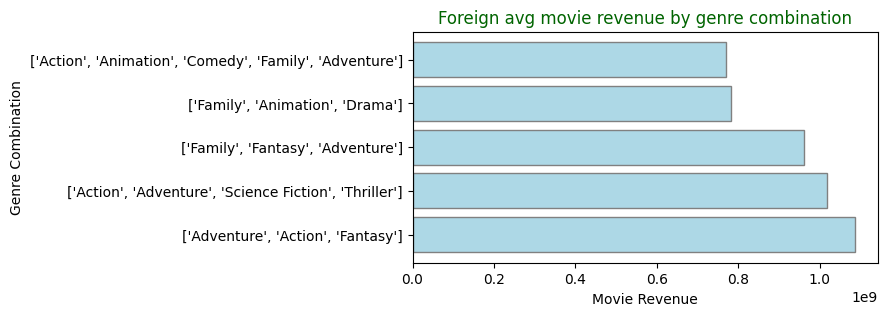

In [101]:
# Bar chart for the Top 5 genre combination and revenue generated by the Movies Foreign market
y=df.groupby('Genre_names')['Foreign'].mean()
y=y.sort_values(ascending=False).head(5)

plt.figure(figsize=(6,3))
plt.barh( y.index,y.values, color='lightblue',edgecolor='grey')
plt.title('Foreign avg movie revenue by genre combination',color='darkgreen')
plt.xlabel('Movie Revenue')
plt.ylabel('Genre Combination');


Movies that are a combination of Adventure,Action and Fantasy have the highest average sales in the foreign market

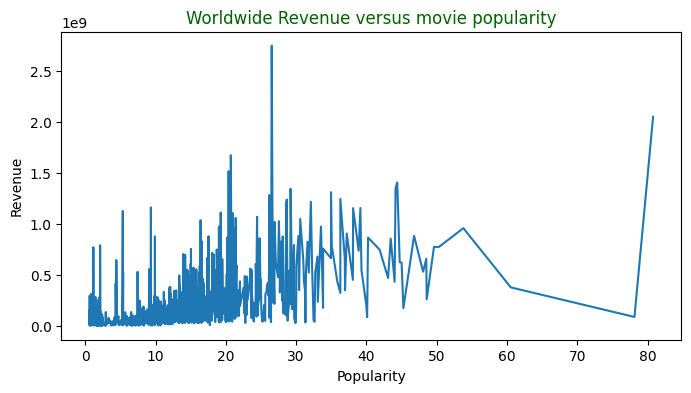

In [99]:
# Line graph showing the revenue aganist movie popularity
y=df.groupby('popularity')['Worldwide'].mean()
plt.figure(figsize=(8,4))
plt.title('Worldwide Revenue versus movie popularity',color='darkgreen')
plt.xlabel('Popularity')
plt.ylabel('Revenue')
plt.plot( y.index,y.values);

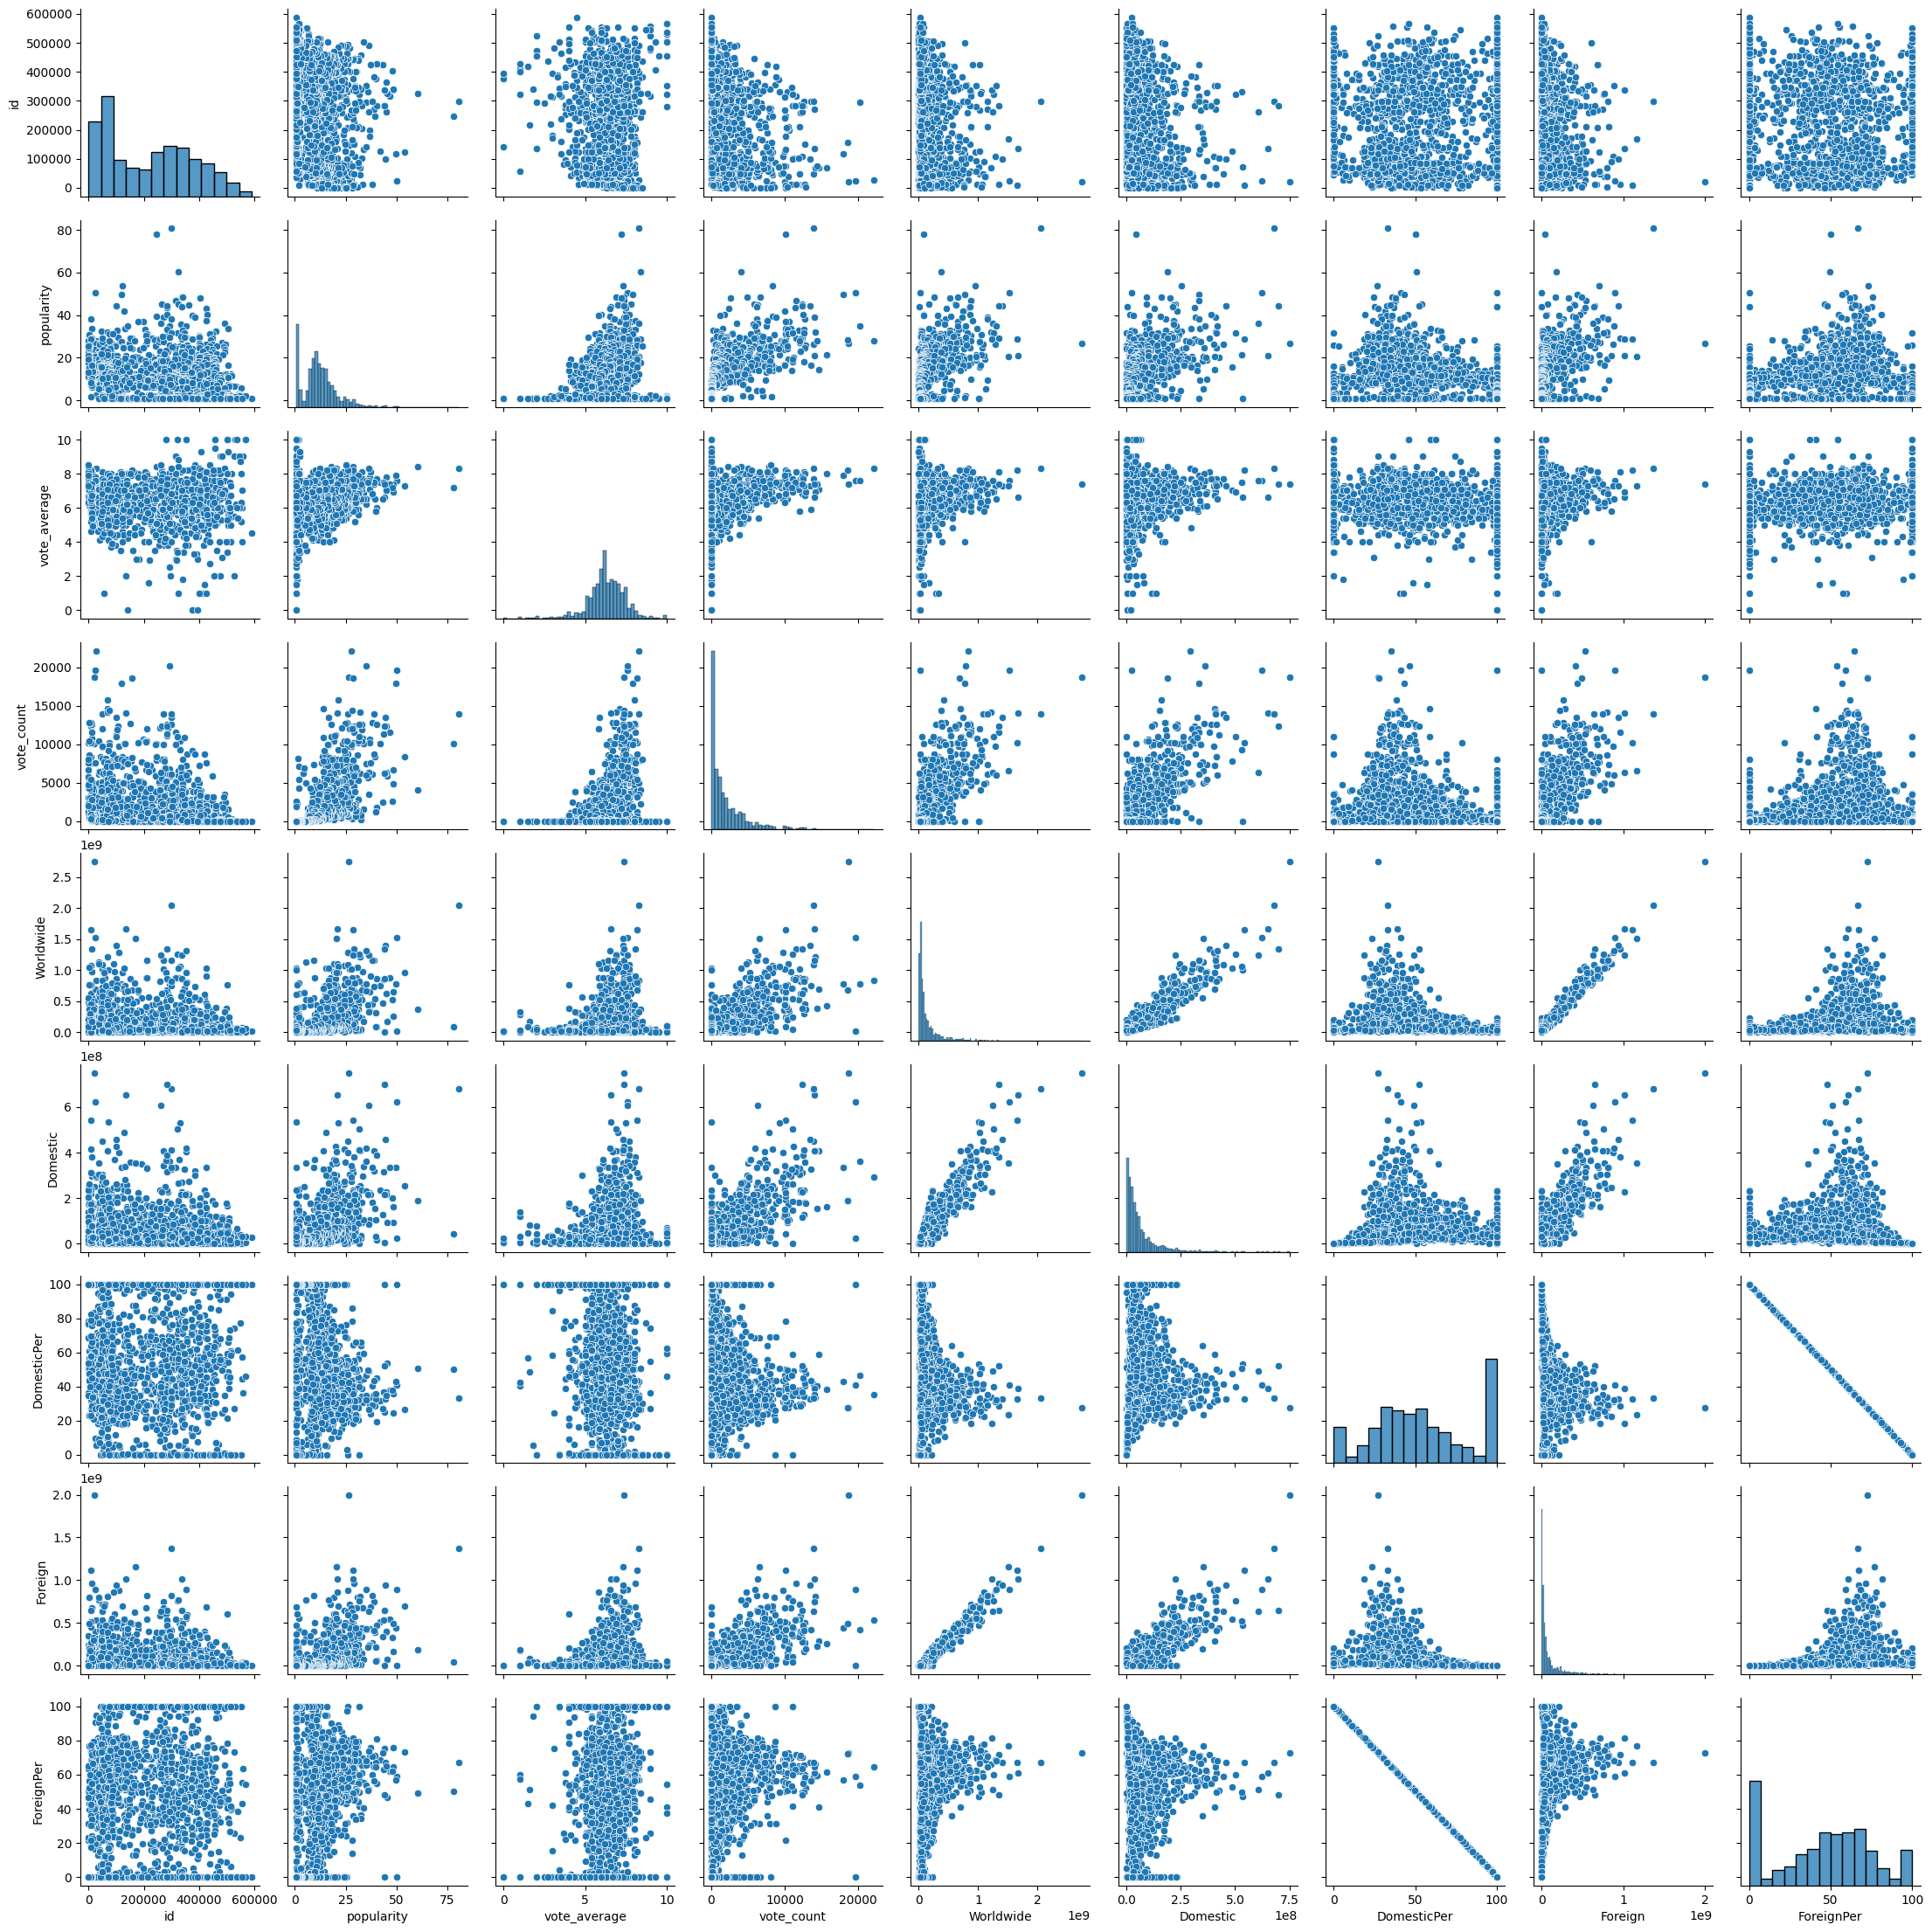

In [100]:
sns.pairplot(df);

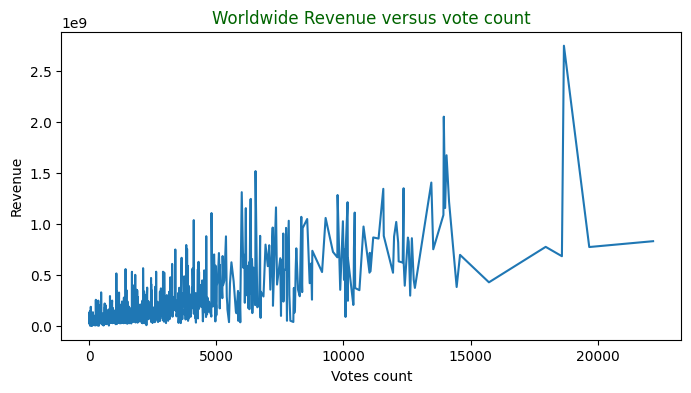

In [109]:
# worldwide revenue aganist movie vote count
y=df.groupby('vote_count')['Worldwide'].mean()
plt.figure(figsize=(8,4))
plt.title('Worldwide Revenue versus vote count',color='darkgreen')
plt.xlabel('Votes count')
plt.ylabel('Revenue')
plt.plot( y.index,y.values);

# **3. Conclusions and Recommendations**



1. Investing in movies with the a combination of Action,Adventure,science Fiction and Thriller will generate the highest average sales worldwide

2. Revenue on the movies increases with increase in the number of votes. Finding a way to encorage people to vote inturn will lead to more sales.

3. from the dataset the revenue for the movies was on an upward trend up to 2010, then its been on a decline. Further analysis is required to establish the reason for the decline.